In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.shape # 150 rows and 6 columns

(150, 5)

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# number of species for each flower
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### 2D Scatter Plot

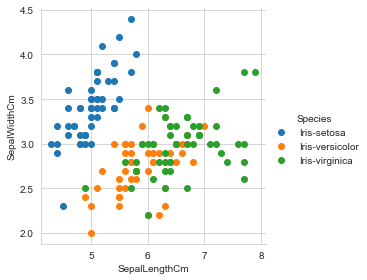

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df, hue='Species',size=4).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

### Pairplots

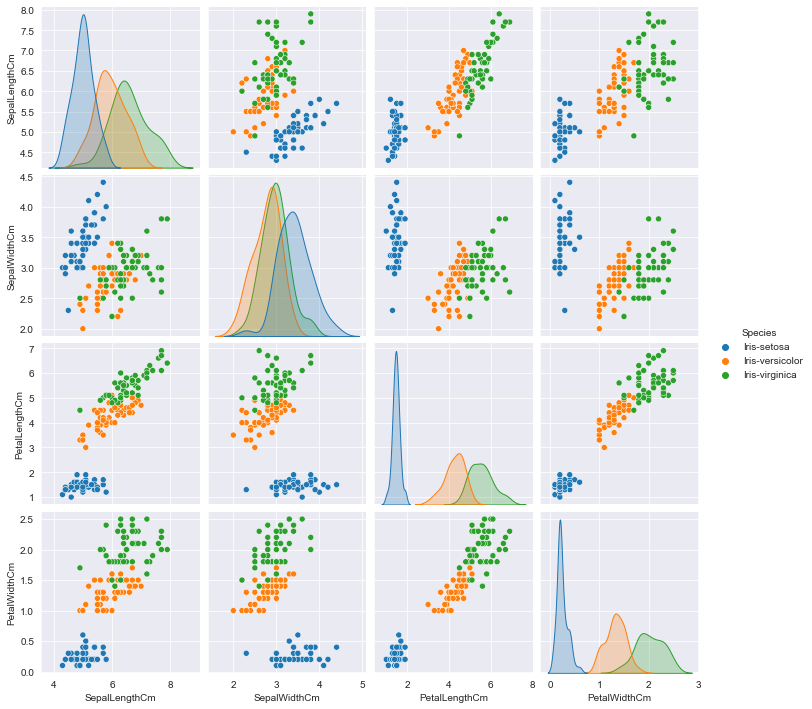

In [9]:
sns.set_style('darkgrid')
sns.pairplot(data=df, hue='Species')
plt.show()

### Histogram PDF, CDF

In [10]:
setosa = df.loc[df['Species']=='Iris-setosa']
virginica = df.loc[df['Species']=='Iris-virginica']
versicolor = df.loc[df['Species']=='Iris-versicolor']

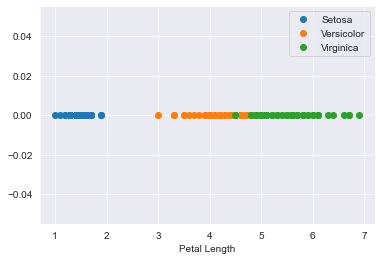

In [11]:
# 1-D plot

plt.plot(setosa['PetalLengthCm'] , np.zeros_like(setosa['PetalLengthCm']), 'o',label='Setosa')
plt.plot(versicolor['PetalLengthCm'] , np.zeros_like(setosa['PetalLengthCm']), 'o',label='Versicolor')
plt.plot(virginica['PetalLengthCm'] , np.zeros_like(setosa['PetalLengthCm']), 'o',label='Virginica')
plt.xlabel('Petal Length')
plt.legend()
plt.show()

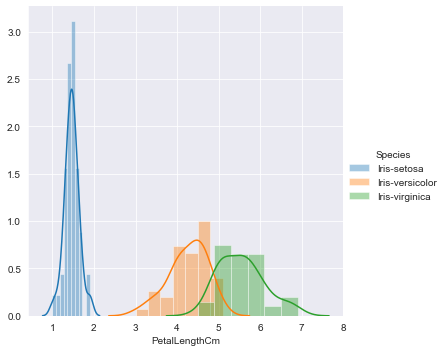

'\nx = petal length\ny = counts within a range / intervals\nThe blocks are the histograms of each specie. The lines are the PDF(prob density func), smooth form of hist\n\nPDF- can be used for univariate analysis (one feature),\n'

In [12]:
#plotting a histogram
sns.set_style('darkgrid')
sns.FacetGrid(data=df, hue='Species',size=5).map(sns.distplot, 'PetalLengthCm').add_legend()
plt.show()

'''
x = petal length
y = counts within a range / intervals
The blocks are the histograms of each specie. The lines are the PDF(prob density func), smooth form of hist

PDF- can be used for univariate analysis (one feature),
'''

### Cumulative Distribution Function CDF

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


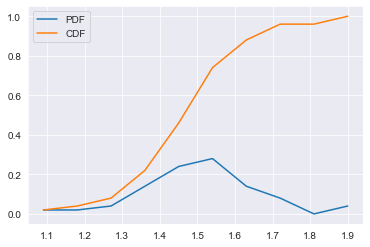

In [13]:
# CDF shows what what percent of values lies in a interval- use of measure the accuracy when selected a threshold

# plotting pdf and cdf on a graph
counts, bin_edges = np.histogram(setosa['PetalLengthCm'],bins=10,density=True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)

# calculating and plotting cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.legend()
plt.show()

### Mean - Variance - Std Deviation

In [14]:
# # simple statistical functions
# np.mean() # exposed to outliers
# np.std()  # 
# np.var()

In [15]:
# to solve the above issues we have IQR, Median and Percentile

# median only gets corrupted when 50% obs are wrong

# Quantiles (25,50,75,100 percentile) and 
# Percentiles - tells us what % of points are below and above a certain percentile

print(np.percentile(setosa['PetalLengthCm'],75))

1.5750000000000002


### Boxplot and whiskers

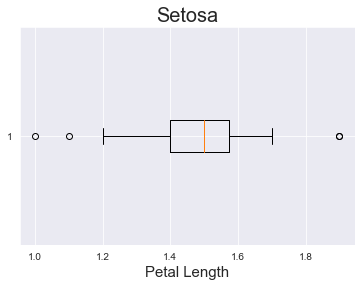

In [16]:
# used to plot the percentiles of a plot

plt.boxplot(setosa['PetalLengthCm'],vert=False)
plt.xlabel('Petal Length',size=15)
plt.title("Setosa",size=20)
plt.show()

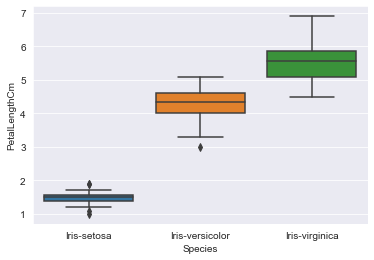

In [17]:
# another method using sns
# whiskers 1.5*IQR
sns.boxplot(x='Species' , y='PetalLengthCm',data=df,)
plt.show()

###  Multivariate Density Plot

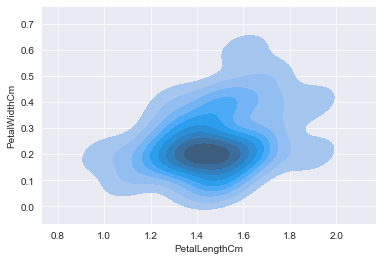

In [18]:
# our PDF was a univariate density plot - one feature
# here our contour plot is multivariate density plot - two features (for now)

sns.kdeplot(data=setosa, x='PetalLengthCm',y='PetalWidthCm',kind='kde',shade=True)
plt.show()

# the more dense the area, the more points are there , the darker the higher the density